In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
plt.rcParams["figure.figsize"]=(10,5)
plt.rcParams["figure.dpi"]=250
import warnings
warnings.filterwarnings("ignore")

# Buyer ratio ( Using Chi-Square Test )

In [6]:
BR= pd.read_csv("BuyerRatio (1).csv", index_col=0)
BR

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


Applying Chi-Square  contingency table to convert observed value into expected value

In [9]:
stat, p, dof, exp=stats.chi2_contingency(BR)

In [13]:
print( stat, "\n", p, "\n", dof ,"\n", exp)

1.595945538661058 
 0.6603094907091882 
 3 
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [14]:
observed = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299,  146.81287862,  131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 747.69575948])

comparing evidence with hypothesis

In [16]:
Statistic, p_values = stats.chisquare(observed, expected, ddof=3 )
print("statistics=", Statistic, "\n", "P value= ", p_values)

statistics= 1.5959455390914483 
 P value=  0.8095206646905712


In [19]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_values))
if p_values <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.810
We fail to reject Null hypothesis


# LabTat (using Annova Test)

In [20]:
import scipy.stats as stats

In [22]:
Lab=pd.read_csv('LabTAT.csv')
Lab


,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [23]:
Lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [25]:
Lab.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [26]:
Lab[Lab.duplicated()].shape

(0, 4)

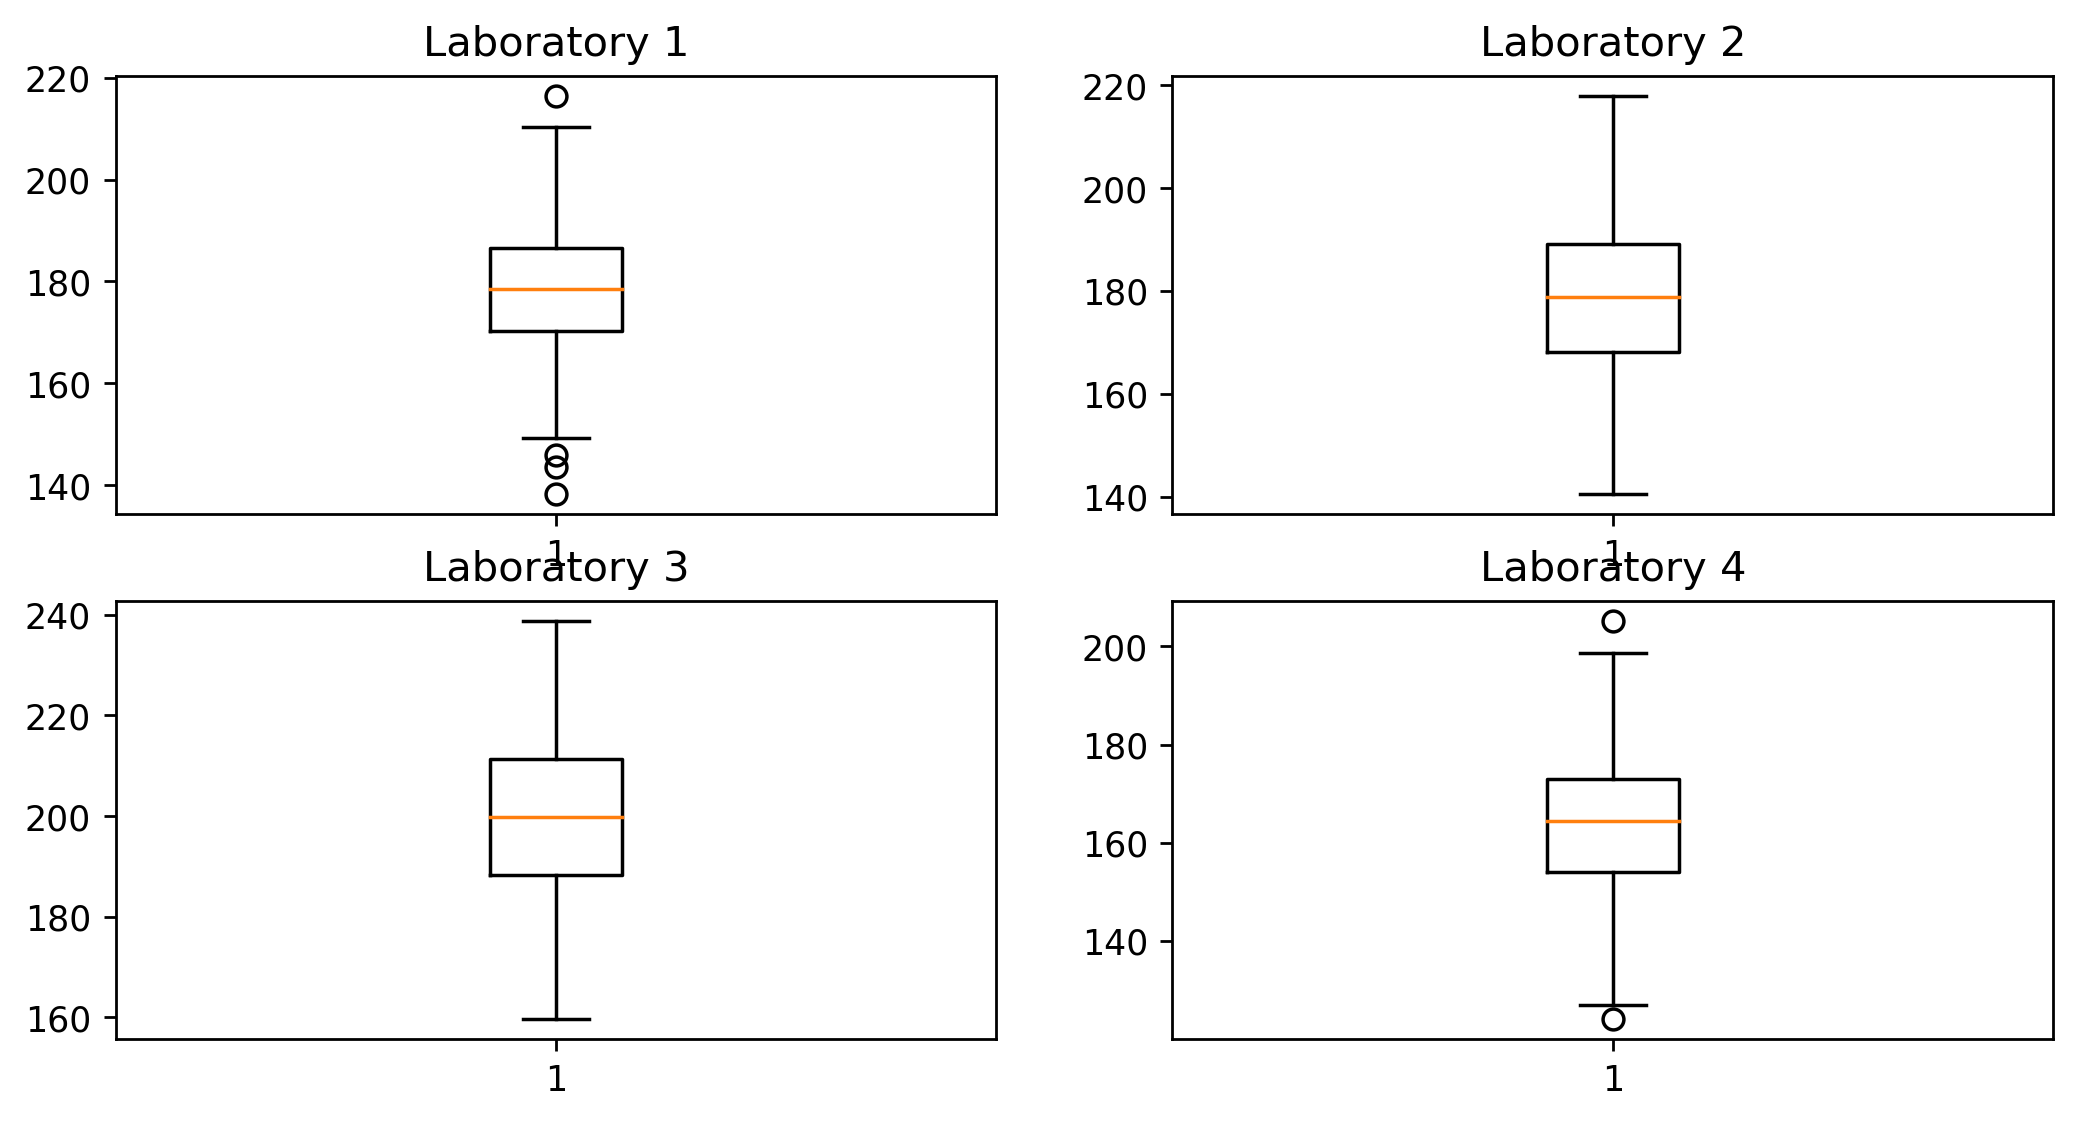

In [28]:
plt.subplot(221)
plt.boxplot(Lab['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(Lab['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(Lab['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(Lab['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

In [29]:
stats.f_oneway(Lab.iloc[:,0],Lab.iloc[:,1],Lab.iloc[:,2],Lab.iloc[:,3])

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

In [30]:
# P-value is less than 0.05.
# so we reject null hypothesis & accept Alternative Hypothesis.
#There is  difference in average TAT among the laboratories.

# Cutlets (using Two Sample T test)

In [33]:
cutlets=pd.read_csv("Cutlets.csv")
cutlets

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [31]:
UnitA=pd.Series([6.809,6.4376,6.9157,7.3012,7.4488,7.3871,6.8755,7.0621,6.684,6.8236,7.393,7.5169,6.9246,6.9256,6.5797,6.8394,6.597,7.2705,7.2828,7.3495,6.9438,7.156,6.5341,7.2854,6.9952,6.8568,7.2163,6.6801,6.9431,7.0852,6.7794,7.2783,7.1561,7.3943,6.9405])
UnitB=pd.Series([6.7703,7.5093,6.73,6.7878,7.1522,6.811,7.2212,6.6606,7.2402,7.0503,6.881,7.4059,6.7652,6.038,7.1581,7.024,6.6672,7.4314,7.307,6.7478,6.8889,7.422,6.5217,7.1688,6.7594,6.9399,7.0133,6.9182,6.3346,7.5459,7.0992,7.118,6.6965,6.578,7.3875])

In [34]:
stats.ttest_ind(UnitA,UnitB)

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

In [36]:
# P-Value is greater than 0.05. So, We Accept the Null Hypothesis. 
#It means there is any significant difference in the diameter of the cutlet between two units. 

# Customer Form (using Chi-Square Test)

In [37]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [38]:
data=pd.read_csv('Costomer+OrderForm.csv')
data

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [39]:
print(data['Phillippines'].value_counts(),data['Indonesia'].value_counts(),data['Malta'].value_counts(),data['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 Error Free    269
Defective      31
Name: Malta, dtype: int64 Error Free    280
Defective      20
Name: India, dtype: int64


In [40]:
observed=([[271,267,269,280],[29,33,31,20]])

In [41]:
observed

[[271, 267, 269, 280], [29, 33, 31, 20]]

In [42]:
data1=chi2_contingency([[271,267,269,280],[29,33,31,20]])

In [43]:
data1

Chi2ContingencyResult(statistic=3.858960685820355, pvalue=0.2771020991233135, dof=3, expected_freq=array([[271.75, 271.75, 271.75, 271.75],
       [ 28.25,  28.25,  28.25,  28.25]]))

In [44]:
# From above value we get Stat=3.858960 , p-value=0.2771 , dof=3 , Expected values

In [45]:
# P-value is more than 0.05 So we reject Alternate Hypothesis & Accept Null Hypothesis.

In [47]:
Probability = 1-0.05
Probability

0.95

In [48]:
critical_value = chi2.ppf(0.95,3)

In [49]:
critical_value

7.814727903251179

In [50]:
# Critical Value > Stats so we reject Alternate Hypothesis & Accept Null Hypothesis.